In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Ex 1

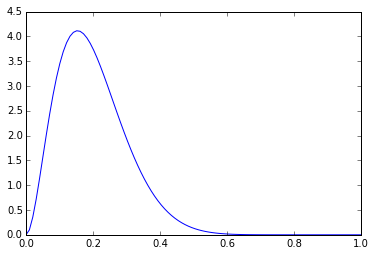

In [2]:
# ex 1.a
u = 0.2
s = 0.01
a = u*(u*(1-u)/s-1)
b = a*(1-u)/u
x = np.linspace(0, 1, 100)
pdf = stats.beta.pdf(x, a, b)
plt.plot(x, pdf, label='beta pdf')

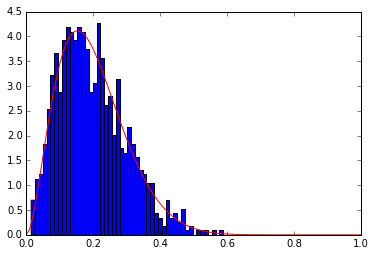

In [3]:
# ex 1.b
r = stats.beta.rvs(a, b, size=1000)
_ = plt.hist(r, 50, normed=True)
plt.plot(x, pdf, 'r', label='beta pdf')
plt.show()

In [4]:
# ex 1.c
assert np.abs(np.mean(r)-u) < 0.01
assert np.abs(np.var(r)-s) < 0.01

In [5]:
# ex 1.d
lower = np.percentile(r, 2.5)
upper = np.percentile(r, 97.5)
(lower, upper)

(0.042812633630736799, 0.4322069132123858)

# Ex 2

Given a test which can have a positive ($pos$) or a negative ($neg$) outcome, and a person that can either have cancer ($cancer$) or not ($\neg cancer$). There are 4 possible outcomes:
 * $pos$ and $cancer$
 * $neg$ and $\neg cancer$
 * $pos$ and $\neg cancer$
 * $neg$ and $cancer$
 
These are given:

\begin{align}
P(pos | cancer) &= 0.98 \\
P(neg | \neg cancer) &= 0.96 \\
P(cancer) &= 0.001
\end{align}

Let us assume the test is free, it costs $c_1$ to not treat someone who has cancer, and that it costs $c_2$ to treat someone of cancer, whether they have it or not.

We need to pick one of two scenarios:
1. We test no-one, and treat no-one.
2. We test everyone, and treat everyone tested positive.

To do that we'll calculate the probability of each of the outcomes, under the two scenarios, and calculate the weighted average cost $C$, and pick the scenario with the smallest cost. 

It's easy to calculate the weighted average cost for scenario 1, since no-one will get treated, the only cost left is not treating someone with cancer, $c_1$:

\begin{align}
C_1 &= c_1P(cancer) \\\\
C_1 &= 0.001c_1
\end{align}

For the second scenario the cost is the following

\begin{align}
C_2 &= c_1P(cancer|neg) + c_2P(pos) \\\\
C_2 &= c_1P(cancer|neg) + c_2(P(pos|cancer)P(cancer) + (1-P(neg|\neg cancer))P(\neg cancer)) \\\\
\end{align}

To find $P(cancer|neg)$ we need to use Bayes law so here it is for reference:

\begin{align}
P( A | B ) &= \frac{ P(B | A) P(A) } {P(B)} \\
\end{align}

Using bayes law we get

\begin{align}
P(cancer|neg) &= \frac{ P(neg|cancer)P(cancer) } { P(neg) } \\\\
P(cancer|neg) &= \frac{ (1-P(pos|cancer))P(cancer) } { P(neg|cancer)P(cancer)+P(neg|\neg cancer)P(\neg cancer) } \\\\
P(cancer|neg) &= \frac{ (1-P(pos|cancer))P(cancer) } { (1-P(pos|cancer))P(cancer)+P(neg|\neg cancer)P(\neg cancer) } \\\\
P(cancer|neg) &= \frac{ (1-0.98) \cdot 0.001 } { (1 - 0.98)\cdot 0.001 + 0.96\cdot(1-0.001)} \\\\
P(cancer|neg) &= 0.00002085375
\end{align}

Now we can find $C_2$

\begin{align}
C_2 &= 0.00002085375c_1 + 0.04094c_2
\end{align}

Scenario two is best if the cost is lower.

\begin{align}
C_2 &< C_1 \\\\
0.00002085375c_1 + 0.04094c_2 &< 0.001c_1 \\\\
c_2 &< 0.0239166c_1
\end{align}

